In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/A/Train'
test_dir = '/content/drive/MyDrive/A/Test'

Mounted at /content/drive


In [3]:
# Load model for feature extraction
model = InceptionV3(weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [4]:
# Function to extract features from an image
def extract_features_IV3net(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features

In [5]:
# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_IV3net(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)

1/1 [==============================] - 0s 149ms/step


In [6]:
# Load images and extract features
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_IV3net(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 0s 141ms/step


In [7]:
import torch

# Load the model using torch.load
model_classification = torch.load('/content/drive/MyDrive/NewModel.h5')

# Function to classify features using NewModel.h5
def classify_features(features):
    # Convert features to torch tensor
    features_tensor = torch.tensor(features)

    # Set the model to evaluation mode
    model_classification.eval()

    # Forward pass
    with torch.no_grad():
        predictions = model_classification(features_tensor)

    # Get the predicted classes
    _, predicted_classes = torch.max(predictions, 1)

    return predicted_classes.numpy()

Training Bernoulli Naive Bayes for InceptionV3...
Performance metrics for Bernoulli Naive Bayes with InceptionV3:
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.63      0.72        60
           1       0.67      0.88      0.76        60
           2       0.67      0.50      0.57        60
           3       0.75      0.83      0.79        60
           4       0.75      0.78      0.76        60

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.72       300
weighted avg       0.73      0.73      0.72       300

Accuracy: 0.7266666666666667
Sensitivity: 0.7266666666666667
Precision: 0.7311880203771873
F1 Score: 0.7205257697282339
Specificity: 0.7266666666666667
Recall: 0.7266666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


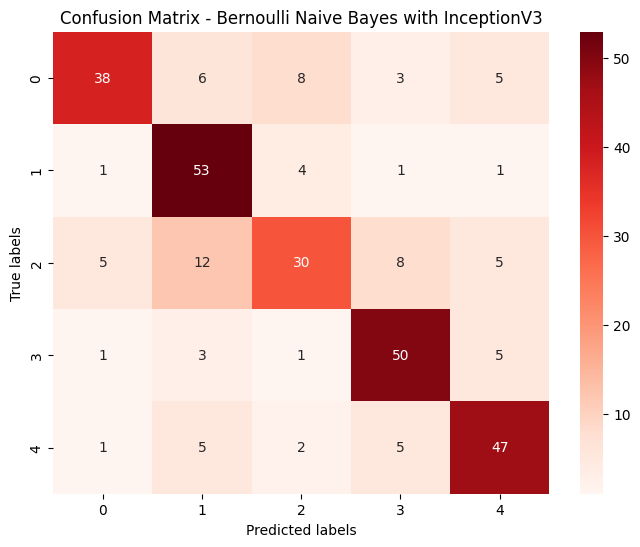

Training Multinomial Naive Bayes for InceptionV3...
Performance metrics for Multinomial Naive Bayes with InceptionV3:
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.62      0.69        60
           1       0.68      0.83      0.75        60
           2       0.66      0.52      0.58        60
           3       0.75      0.83      0.79        60
           4       0.70      0.75      0.73        60

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.70       300
weighted avg       0.71      0.71      0.70       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy: 0.71
Sensitivity: 0.7100000000000001
Precision: 0.7110954267621066
F1 Score: 0.7048202241308209
Specificity: 0.7100000000000001
Recall: 0.7100000000000001



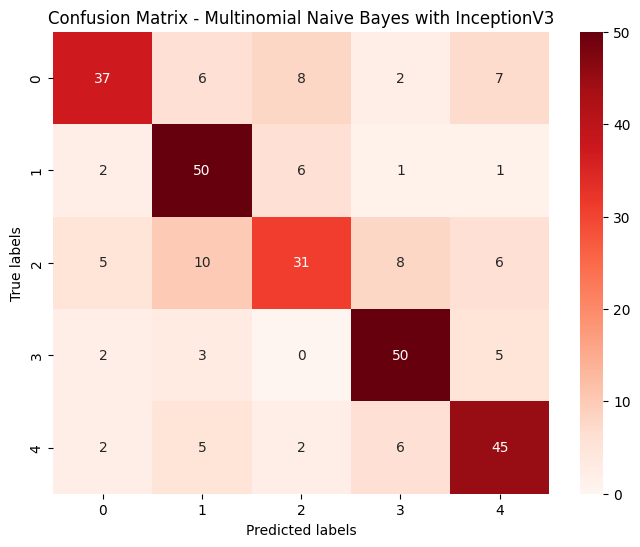

Training Complement Naive Bayes for InceptionV3...
Performance metrics for Complement Naive Bayes with InceptionV3:
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.55      0.65        60
           1       0.56      0.95      0.70        60
           2       0.79      0.25      0.38        60
           3       0.73      0.77      0.75        60
           4       0.64      0.78      0.70        60

    accuracy                           0.66       300
   macro avg       0.70      0.66      0.64       300
weighted avg       0.70      0.66      0.64       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy: 0.66
Sensitivity: 0.6599999999999999
Precision: 0.6998610729260883
F1 Score: 0.6359938759328767
Specificity: 0.6599999999999999
Recall: 0.6599999999999999



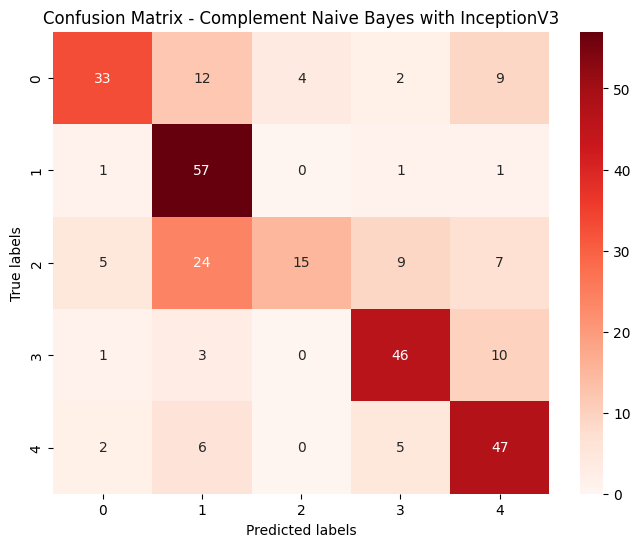

Training Gaussian Naive Bayes for InceptionV3...
Performance metrics for Gaussian Naive Bayes with InceptionV3:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.98      1.00      0.99        60
           2       1.00      1.00      1.00        60
           3       1.00      0.98      0.99        60
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 0.9966666666666667
Sensitivity: 0.9966666666666667
Precision: 0.9967213114754099
F1 Score: 0.996666435169109
Specificity: 0.9966666666666667
Recall: 0.9966666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


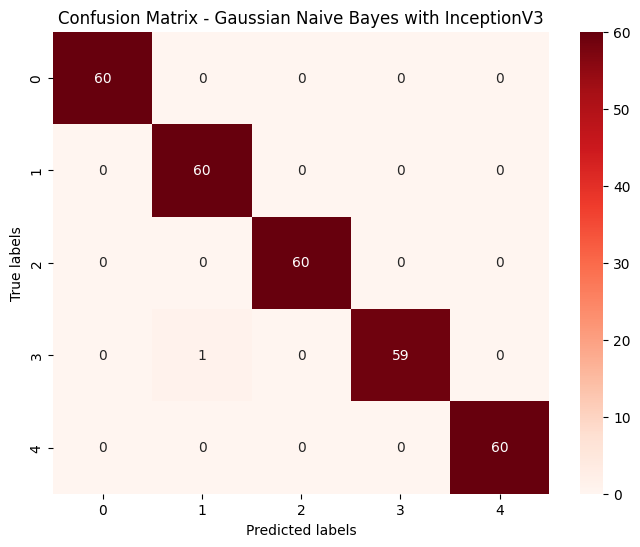

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
from tensorflow.keras import layers
import torch
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# Flatten the features for B2
x_train_flat_b2 = np.array([feature.flatten() for feature in x_train])
x_test_flat_b2 = np.array([feature.flatten() for feature in x_test])

# Scale the input features to the range [0, 1] for B2
scaler_b2 = MinMaxScaler()
x_train_scaled_b2 = scaler_b2.fit_transform(x_train_flat_b2)
x_test_scaled_b2 = scaler_b2.transform(x_test_flat_b2)

# Ensure non-negative values for B2
min_value_b2 = np.min(np.concatenate([x_train_scaled_b2, x_test_scaled_b2]))
x_train_scaled_non_negative_b2 = x_train_scaled_b2 - min_value_b2
x_test_scaled_non_negative_b2 = x_test_scaled_b2 - min_value_b2

# List of classifiers to try
classifiers = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

for clf_name, clf in classifiers.items():
    print(f"Training {clf_name} for InceptionV3...")
    # Train classifier
    clf.fit(x_train_scaled_non_negative_b2, y_train)
    # Predict on test set
    y_pred_b2 = clf.predict(x_test_scaled_non_negative_b2)
    # Print performance metrics
    print(f'Performance metrics for {clf_name} with InceptionV3:')
    print('Classification Report:')
    print(metrics.classification_report(y_test, y_pred_b2))  # Corrected variable names

    # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred_b2)  # Corrected variable names
    sensitivity = metrics.recall_score(y_test, y_pred_b2, average='macro')  # Corrected variable names
    precision = metrics.precision_score(y_test, y_pred_b2, average='macro')  # Corrected variable names
    f1 = metrics.f1_score(y_test, y_pred_b2, average='macro')  # Corrected variable names
    specificity = metrics.recall_score(y_test, y_pred_b2, average='macro', pos_label=0)  # Specificity
    recall = metrics.recall_score(y_test, y_pred_b2, average='macro')  # Recall

    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity: {sensitivity}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}')
    print(f'Specificity: {specificity}')
    print(f'Recall: {recall}\n')

    # Confusion matrix
    cm_b2 = confusion_matrix(y_test, y_pred_b2)  # Corrected variable names

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_b2, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name} with InceptionV3')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
